Mean Squared Error: 16.45578896278634
R^2 Score: 0.1890542855507087


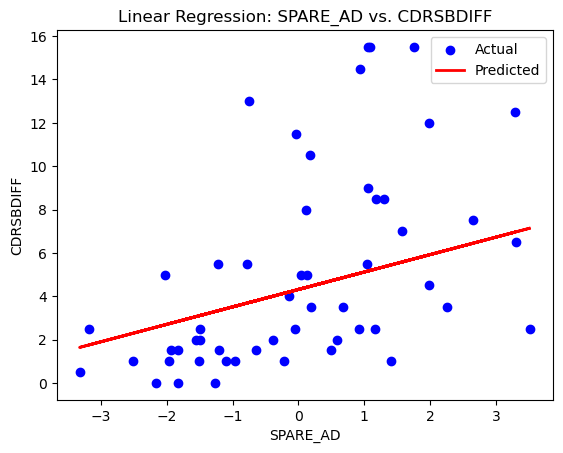

Mean Squared Error (Reverse): 2.1016890470881
R^2 Score (Reverse): 0.2134609401899844


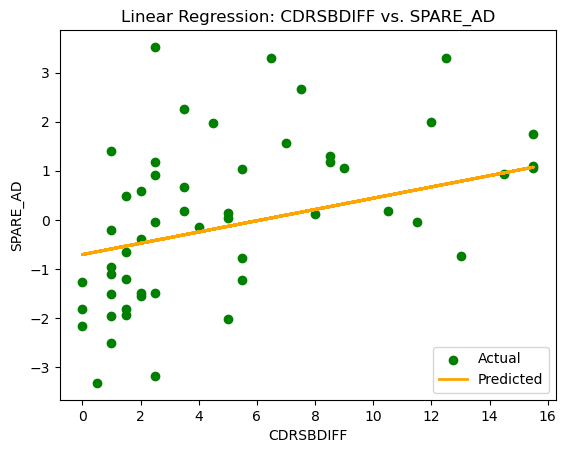

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('cdr/CDRSBDIFFvSPAREAD.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into features and target variables
X = data[['SPARE_AD']]
y = data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('SPARE_AD')
plt.ylabel('CDRSBDIFF')
plt.title('Linear Regression: SPARE_AD vs. CDRSBDIFF')
plt.legend()
plt.show()

# Repeat for the reverse correlation: CDRSBDIFF as feature, SPARE_AD as target
X_reverse = data[['CDRSBDIFF']]
y_reverse = data['SPARE_AD']

# Split the data into training and testing sets
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_reverse, y_reverse, test_size=0.2, random_state=42)

# Train a linear regression model
model_rev = LinearRegression()
model_rev.fit(X_train_rev, y_train_rev)

# Predict on the test set
y_pred_rev = model_rev.predict(X_test_rev)

# Evaluate the model
mse_rev = mean_squared_error(y_test_rev, y_pred_rev)
r2_rev = r2_score(y_test_rev, y_pred_rev)

print(f'Mean Squared Error (Reverse): {mse_rev}')
print(f'R^2 Score (Reverse): {r2_rev}')

# Plot the results
plt.scatter(X_test_rev, y_test_rev, color='green', label='Actual')
plt.plot(X_test_rev, y_pred_rev, color='orange', linewidth=2, label='Predicted')
plt.xlabel('CDRSBDIFF')
plt.ylabel('SPARE_AD')
plt.title('Linear Regression: CDRSBDIFF vs. SPARE_AD')
plt.legend()
plt.show()


Mean Squared Error: 0.20961818611242325
R^2 Score: 0.9905920389383418


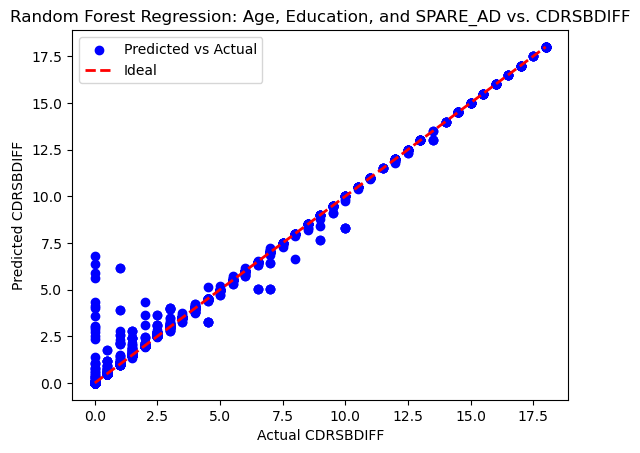

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
spare_ad = pd.read_csv('cdr/sparead.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(spare_ad[['RID', 'SPARE_AD']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'CDRSBDIFF']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'SPARE_AD']]
y = merged_data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual CDRSBDIFF')
plt.ylabel('Predicted CDRSBDIFF')
plt.title('Random Forest Regression: Age, Education, and SPARE_AD vs. CDRSBDIFF')
plt.legend()
plt.show()


Mean Squared Error: 0.20961818611242325
R^2 Score: 0.9905920389383418


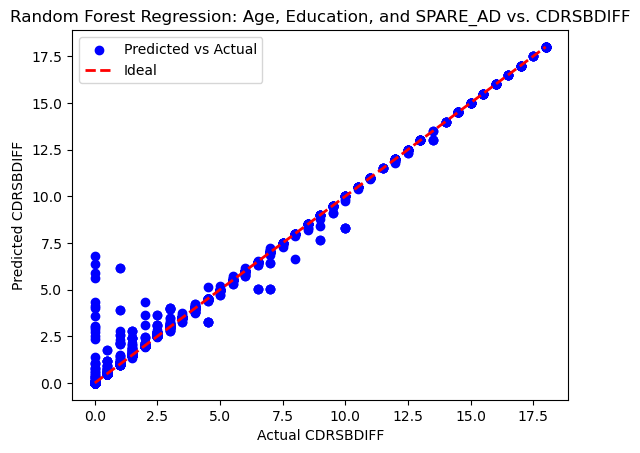

Feature Importances:
           Importance
SPARE_AD    0.622592
AGE_2024    0.219279
PTEDUCAT    0.158128


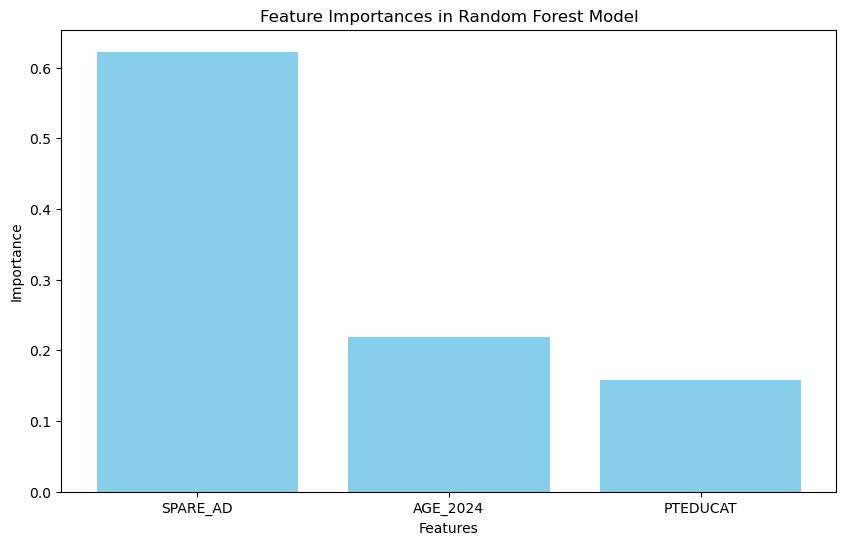

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
spare_ad = pd.read_csv('cdr/sparead.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(spare_ad[['RID', 'SPARE_AD']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'CDRSBDIFF']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'SPARE_AD']]
y = merged_data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual CDRSBDIFF')
plt.ylabel('Predicted CDRSBDIFF')
plt.title('Random Forest Regression: Age, Education, and SPARE_AD vs. CDRSBDIFF')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


Mean Squared Error: 0.018881413316273805
R^2 Score: 0.9991808900849017


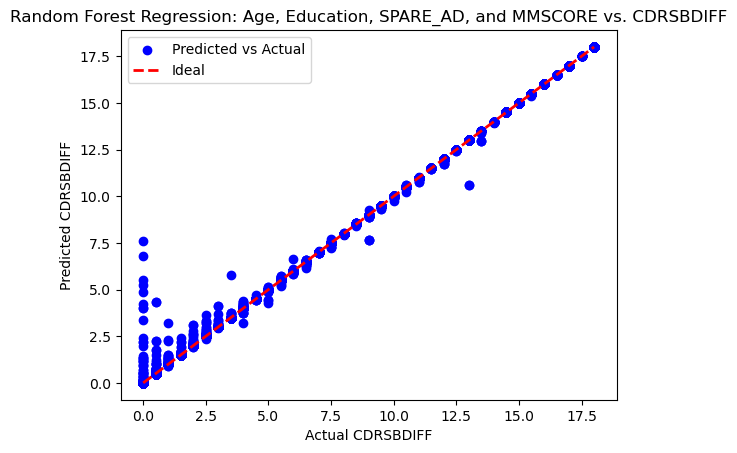

Feature Importances:
           Importance
SPARE_AD    0.473255
MMSCORE     0.244392
AGE_2024    0.169625
PTEDUCAT    0.112729


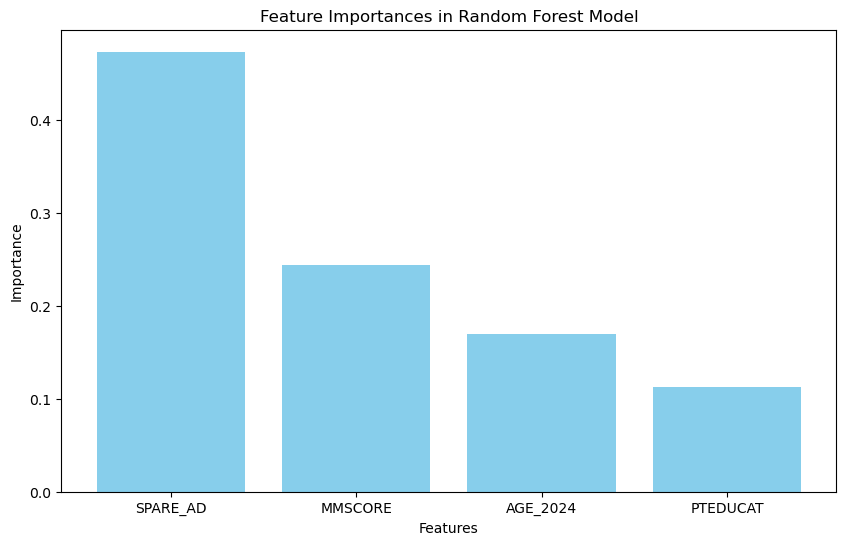

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
spare_ad = pd.read_csv('cdr/sparead.csv')
mm_score = pd.read_csv('cdr/mmse.csv')  # Update with the correct filename

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(spare_ad[['RID', 'SPARE_AD']], on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'MMSCORE', 'CDRSBDIFF']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'MMSCORE']]
y = merged_data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual CDRSBDIFF')
plt.ylabel('Predicted CDRSBDIFF')
plt.title('Random Forest Regression: Age, Education, SPARE_AD, and MMSCORE vs. CDRSBDIFF')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


Mean Squared Error: 0.0
R^2 Score: 1.0


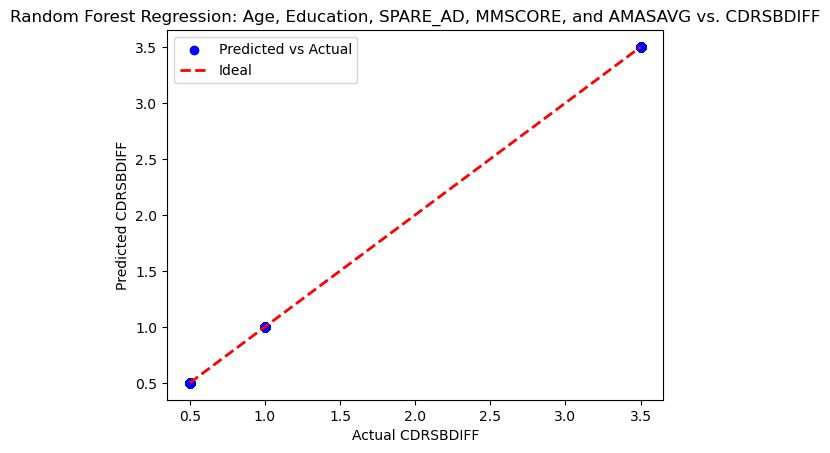

Feature Importances:
           Importance
AMASAVG     0.358225
SPARE_AD    0.328452
PTEDUCAT    0.307834
AGE_2024    0.005489
MMSCORE     0.000000


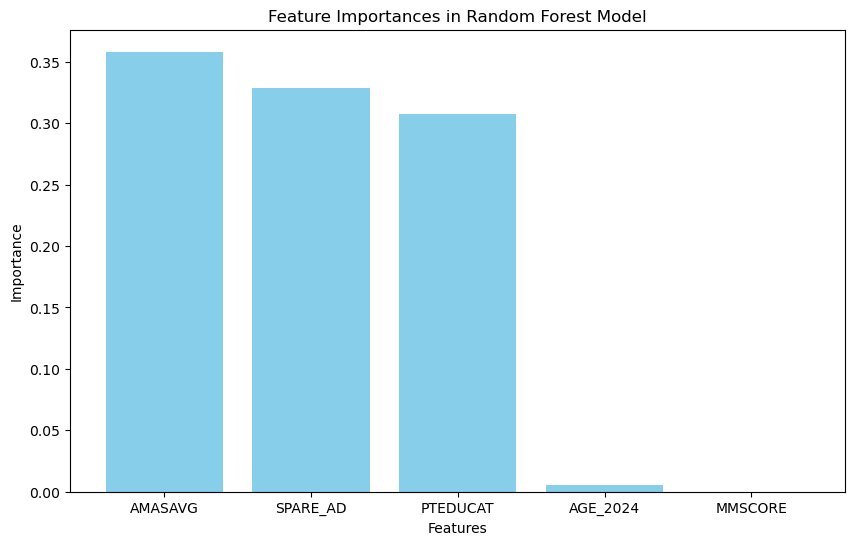

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
spare_ad = pd.read_csv('cdr/sparead.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
amasavg = pd.read_csv('cdr/amas.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Clean AMASAVG data by removing rows with 'DIV/0' errors
amasavg = amasavg[amasavg['AMASAVG'] != 'DIV/0']

# Convert AMASAVG to numeric, forcing errors to NaN
amasavg['AMASAVG'] = pd.to_numeric(amasavg['AMASAVG'], errors='coerce')

# Drop rows with NaN values in AMASAVG
amasavg.dropna(subset=['AMASAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(spare_ad[['RID', 'SPARE_AD']], on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(amasavg[['RID', 'AMASAVG']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'MMSCORE', 'AMASAVG', 'CDRSBDIFF']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'MMSCORE', 'AMASAVG']]
y = merged_data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual CDRSBDIFF')
plt.ylabel('Predicted CDRSBDIFF')
plt.title('Random Forest Regression: Age, Education, SPARE_AD, MMSCORE, and AMASAVG vs. CDRSBDIFF')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


Mean Squared Error: 0.0
R^2 Score: 1.0


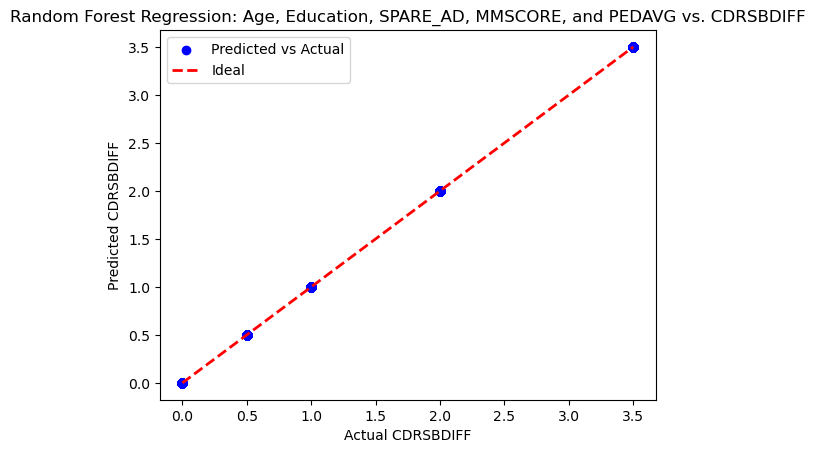

Feature Importances:
           Importance
PTEDUCAT    0.733665
AGE_2024    0.231331
SPARE_AD    0.030097
PEDAVG      0.004908
MMSCORE     0.000000


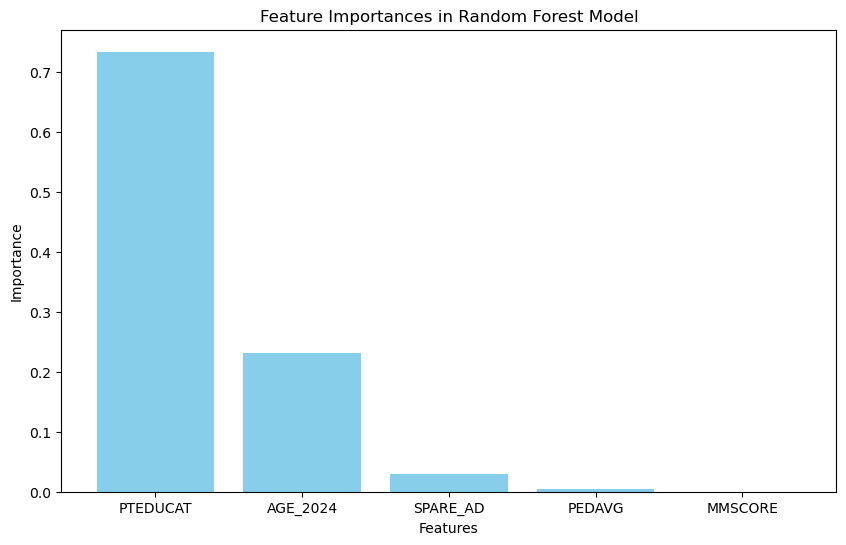

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
spare_ad = pd.read_csv('cdr/sparead.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')  # Add the path to the PED spreadsheet

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']



# Clean PEDAVG data by removing rows with 'DIV/0' errors
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(spare_ad[['RID', 'SPARE_AD']], on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'MMSCORE', 'PEDAVG', 'CDRSBDIFF']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'SPARE_AD', 'MMSCORE', 'PEDAVG']]
y = merged_data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual CDRSBDIFF')
plt.ylabel('Predicted CDRSBDIFF')
plt.title('Random Forest Regression: Age, Education, SPARE_AD, MMSCORE, and PEDAVG vs. CDRSBDIFF')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


15604 3901
Mean Squared Error: 0.09362690574087466
R^2 Score: 0.9433194692170866


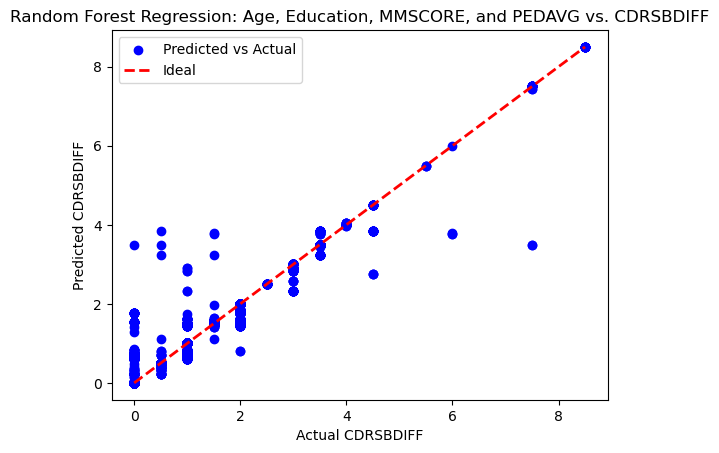

Number of data points: 19505
Feature Importances:
           Importance
AGE_2024    0.501166
PTEDUCAT    0.193094
MMSCORE     0.155465
PEDAVG      0.150275


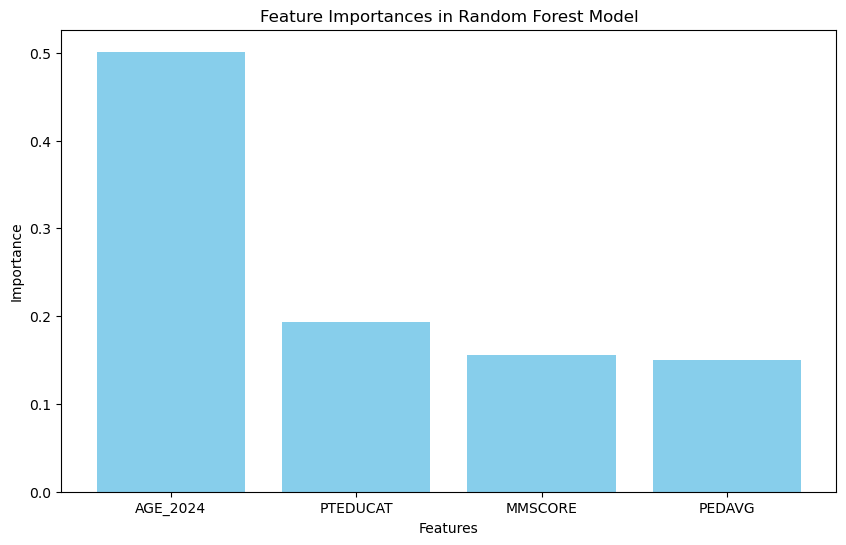

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')  # Add the path to the PED spreadsheet

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']


# Clean PEDAVG data by removing rows with 'DIV/0' errors
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG', 'CDRSBDIFF']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG']]
y = merged_data['CDRSBDIFF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_train), len(y_test))

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual CDRSBDIFF')
plt.ylabel('Predicted CDRSBDIFF')
plt.title('Random Forest Regression: Age, Education, MMSCORE, and PEDAVG vs. CDRSBDIFF')
plt.legend()
plt.show()

print(f'Number of data points: {len(merged_data)}')

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


In [9]:
import pandas as pd 
z = pd.read_csv('cdr/dr.csv')

In [58]:
merged_data.to_csv('cdr/long1_NA.csv')

In [13]:
z = z.sort_values(by=['RID', 'VISDATE'])
z 

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,...,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,NaN,NaN,0.0,...,0.0,0.0,8,107,2005-08-17,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
222,ADNI1,011_S_0002,2,m06,m06,2006-03-06,1.0,NaN,NaN,0.0,...,0.0,0.0,452,107,2006-03-07,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3234,ADNI1,011_S_0002,2,m36,m36,2008-08-27,1.0,NaN,NaN,0.0,...,0.0,0.0,6490,107,2008-08-27,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
4299,ADNIGO,011_S_0002,2,m60,m60,2010-09-22,1.0,NaN,NaN,0.0,...,0.0,0.0,214,8,2010-09-22,NaN,NaN,NaN,NaN,2012-11-16 09:39:34.0
5100,ADNI2,011_S_0002,2,v06,m72,2011-09-19,1.0,1.0,NaN,0.0,...,0.0,0.0,616,8,2011-09-22,NaN,NaN,NaN,NaN,2012-11-16 12:23:27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13431,ADNI4,029_S_10197,10197,4_sc,sc,2024-08-07,1.0,1.0,1.0,0.5,...,0.5,1.0,27436,29,2024-08-09,2024-08-09,v1,e,0.0,2024-08-10 01:46:24.0
13429,ADNI4,941_S_10198,10198,4_sc,sc,2024-08-08,1.0,1.0,1.0,0.0,...,0.0,0.0,27257,941,2024-08-09,2024-08-09,v1,e,0.0,2024-08-10 01:46:24.0
13439,ADNI4,126_S_10201,10201,4_sc,sc,2024-08-12,1.0,1.0,1.0,0.0,...,0.0,0.0,27719,126,2024-08-12,2024-08-12,v1,e,0.0,2024-08-13 01:40:34.0
13438,ADNI4,052_S_10202,10202,4_sc,sc,2024-08-12,1.0,1.0,1.0,0.0,...,0.0,0.0,27696,52,2024-08-12,2024-08-12,v1,e,0.0,2024-08-13 01:40:34.0


In [15]:
z = z.drop_duplicates(subset='RID', keep='last')
z

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,...,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
10176,ADNI3,011_S_0002,2,init,m144,2017-10-18,1.0,1.0,1.0,0.5,...,0.5,2.5,18276,8,2017-10-26,2017-10-26,NaN,NaN,NaN,2018-10-24 22:44:39.0
2269,ADNI1,011_S_0003,3,m24,m24,2007-09-12,1.0,NaN,NaN,2.0,...,1.0,8.0,4556,107,2007-09-22,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3391,ADNI1,022_S_0004,4,m36,m36,2008-11-17,2.0,NaN,NaN,0.5,...,0.5,1.0,6804,10,2008-11-25,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3257,ADNI1,011_S_0005,5,m36,m36,2008-09-10,1.0,NaN,NaN,0.5,...,0.5,1.0,6536,107,2008-09-10,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3421,ADNI1,100_S_0006,6,m36,m36,2008-12-08,1.0,NaN,NaN,0.5,...,0.5,2.0,6866,4,2008-12-11,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13431,ADNI4,029_S_10197,10197,4_sc,sc,2024-08-07,1.0,1.0,1.0,0.5,...,0.5,1.0,27436,29,2024-08-09,2024-08-09,v1,e,0.0,2024-08-10 01:46:24.0
13429,ADNI4,941_S_10198,10198,4_sc,sc,2024-08-08,1.0,1.0,1.0,0.0,...,0.0,0.0,27257,941,2024-08-09,2024-08-09,v1,e,0.0,2024-08-10 01:46:24.0
13439,ADNI4,126_S_10201,10201,4_sc,sc,2024-08-12,1.0,1.0,1.0,0.0,...,0.0,0.0,27719,126,2024-08-12,2024-08-12,v1,e,0.0,2024-08-13 01:40:34.0
13438,ADNI4,052_S_10202,10202,4_sc,sc,2024-08-12,1.0,1.0,1.0,0.0,...,0.0,0.0,27696,52,2024-08-12,2024-08-12,v1,e,0.0,2024-08-13 01:40:34.0


In [17]:
z['CDGLOBAL'].value_counts()

CDGLOBAL
 0.5    1553
 0.0    1286
 1.0     515
 2.0     206
-1.0      64
 3.0      56
Name: count, dtype: int64

In [19]:
z = z.loc[z['CDGLOBAL']!= -1] 
z['CDGLOBAL'].value_counts()

CDGLOBAL
0.5    1553
0.0    1286
1.0     515
2.0     206
3.0      56
Name: count, dtype: int64

In [29]:
import pandas as pd
import numpy as np
!pip install xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the data
#dementia_rating = pd.read_csv('cdr/dementiarating.csv')
dementia_rating = z
demographics = pd.read_csv('cdr/demographics.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Clean PEDAVG data by removing rows with 'DIV/0' errors
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
#print(len(merged_data), len(dementia_rating), len(demographics))
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
#print(len(merged_data), len(mm_score))
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')
#print(len(merged_data), len(ped))
# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG', 'CDGLOBAL']]

# Drop rows with missing values
merged_data.dropna(inplace=True)
#print(len(merged_data))

# Define a function to classify based on CDGLOBAL
def classify_cdglobal(cdglobal):
    if cdglobal == 0:
        return 'CN'  # Cognitively Normal
    elif cdglobal == 0.5:
        return 'MCI'  # Mild Cognitive Impairment
    else:
        return 'AD'  # Alzheimer's Disease

# Apply classification
merged_data['CDGLOBAL_CLASS'] = merged_data['CDGLOBAL'].apply(classify_cdglobal)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG']]
y = merged_data['CDGLOBAL_CLASS']

#print(len(X), len(y))
# Feature Scaling (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Random Forest Classifier with Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Train the best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf}')

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n {conf_matrix_rf}')

class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n {class_report_rf}')

'''# Option 2: XGBoost Classifier (Alternative model)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Model Accuracy: {accuracy_xgb}')

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'Confusion Matrix:\n {conf_matrix_xgb}')

class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f'Classification Report:\n {class_report_xgb}')

# Feature Importance Plot for the best model (Random Forest or XGBoost)
feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG'], columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Best Random Forest Model')
plt.show()'''


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Cross-Validation Score: 0.9144452129236242
Random Forest Model Accuracy: 0.944954128440367
Confusion Matrix:
 [[ 35   0   3]
 [  1 179  14]
 [  3   3 198]]
Classification Report:
               precision    recall  f1-score   support

          AD       0.90      0.92      0.91        38
          CN       0.98      0.92      0.95       194
         MCI       0.92      0.97      0.95       204

    accuracy                           0.94       436
   macro avg       0.93      0.94      0.94       436
weighted avg       0.95      0.94      0.95       436



'# Option 2: XGBoost Classifier (Alternative model)\nxgb_model = XGBClassifier(use_label_encoder=False, eval_metric=\'mlogloss\', random_state=42)\nxgb_model.fit(X_train, y_train)\n\n# Predict on the test set\ny_pred_xgb = xgb_model.predict(X_test)\n\n# Evaluate the XGBoost model\naccuracy_xgb = accuracy_score(y_test, y_pred_xgb)\nprint(f\'XGBoost Model Accuracy: {accuracy_xgb}\')\n\nconf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)\nprint(f\'Confusion Matrix:\n {conf_matrix_xgb}\')\n\nclass_report_xgb = classification_report(y_test, y_pred_xgb)\nprint(f\'Classification Report:\n {class_report_xgb}\')\n\n# Feature Importance Plot for the best model (Random Forest or XGBoost)\nfeature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=[\'AGE_2024\', \'PTEDUCAT\', \'MMSCORE\', \'PEDAVG\'], columns=[\'Importance\']).sort_values(\'Importance\', ascending=False)\nprint("Feature Importances:\n", feature_importances)\n\nplt.figure(figsize=(10, 6))\nplt.bar(feature_impor

## Hereon: still experimenting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Clean PEDAVG data by removing rows with 'DIV/0' errors
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG', 'CDGLOBAL']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define a function to classify based on CDGLOBAL
def classify_cdglobal(cdglobal):
    if cdglobal == 0:
        return 'CN'  # Cognitively Normal
    elif cdglobal == 0.5:
        return 'MCI'  # Mild Cognitive Impairment
    elif cdglobal >= 1.0:
        return 'AD'  # Alzheimer's Disease
    else:
        return None

# Apply classification
merged_data['CDGLOBAL_CLASS'] = merged_data['CDGLOBAL'].apply(classify_cdglobal)

# Drop any rows where classification resulted in None (e.g., CDR values that are not 0, 0.5, or >= 1.0)
merged_data.dropna(subset=['CDGLOBAL_CLASS'], inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG']]
y = merged_data['CDGLOBAL_CLASS']

# Feature Scaling (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Random Forest Classifier with Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Train the best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Compute ROC AUC Score
y_test_bin = label_binarize(y_test, classes=['CN', 'MCI', 'AD'])
y_pred_rf_bin = label_binarize(y_pred_rf, classes=['CN', 'MCI', 'AD'])
roc_auc_rf = roc_auc_score(y_test_bin, y_pred_rf_bin, average='weighted', multi_class='ovr')

print(f'Random Forest Model Precision: {precision_rf}')
print(f'Random Forest Model Recall: {recall_rf}')
print(f'Random Forest Model ROC AUC: {roc_auc_rf}')

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n {conf_matrix_rf}')

class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n {class_report_rf}')

# Option 2: XGBoost Classifier (Alternative model)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Compute ROC AUC Score
y_pred_xgb_bin = label_binarize(y_pred_xgb, classes=['CN', 'MCI', 'AD'])
roc_auc_xgb = roc_auc_score(y_test_bin, y_pred_xgb_bin, average='weighted', multi_class='ovr')

print(f'XGBoost Model Precision: {precision_xgb}')
print(f'XGBoost Model Recall: {recall_xgb}')
print(f'XGBoost Model ROC AUC: {roc_auc_xgb}')

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'Confusion Matrix:\n {conf_matrix_xgb}')

class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f'Classification Report:\n {class_report_xgb}')

# Feature Importance Plot for the best model (Random Forest or XGBoost)
feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG'], columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Best Random Forest Model')
plt.show()

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_pred_rf_bin.ravel())
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC Curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


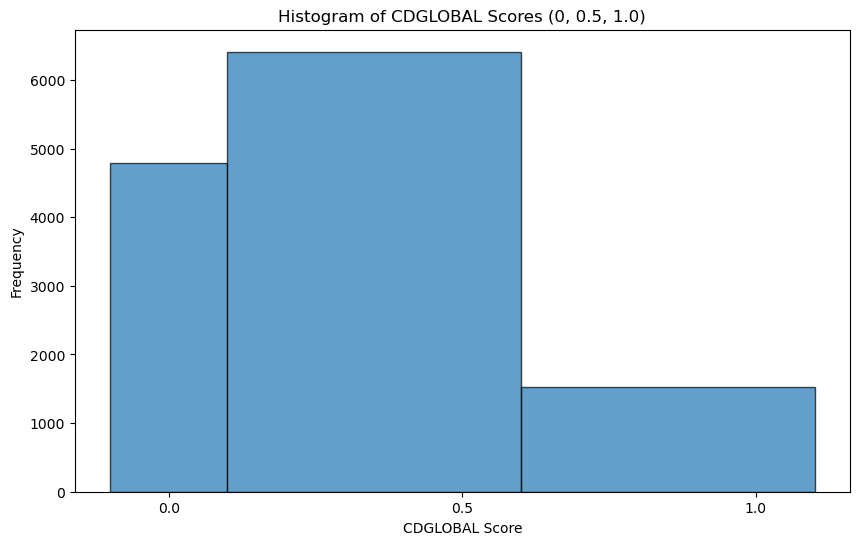

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')

# Select the CDGLOBAL column
cdglobal_values = dementia_rating['CDGLOBAL']

# Filter for CDGLOBAL values of 0, 0.5, and 1
filtered_cdglobal = cdglobal_values[cdglobal_values.isin([0, 0.5, 1.0])]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_cdglobal, bins=[-0.1, 0.1, 0.6, 1.1], edgecolor='black', alpha=0.7)
plt.xticks([0, 0.5, 1.0])
plt.xlabel('CDGLOBAL Score')
plt.ylabel('Frequency')
plt.title('Histogram of CDGLOBAL Scores (0, 0.5, 1.0)')
plt.show()


Explained variance by each component: [0.34348998 0.25627079]
              precision    recall  f1-score   support

          AD       0.33      0.16      0.22        63
          CN       0.86      0.84      0.85      1857
         MCI       0.83      0.86      0.85      1954

    accuracy                           0.84      3874
   macro avg       0.67      0.62      0.64      3874
weighted avg       0.84      0.84      0.84      3874

[[  10    7   46]
 [   2 1569  286]
 [  18  258 1678]]


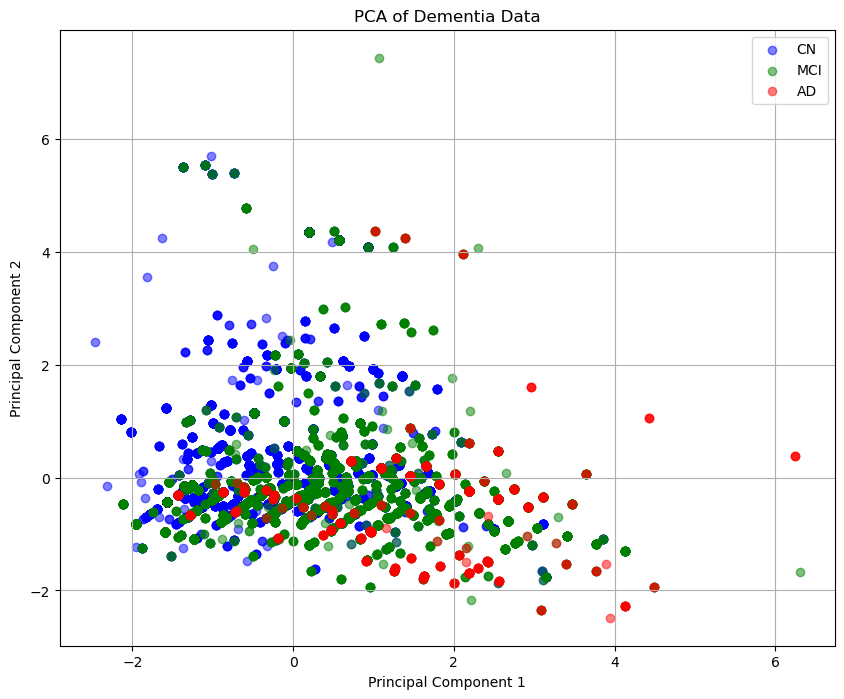

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assume you have your merged data ready
# merged_data = your merged dataframe from the steps you've already taken

# Select relevant features (input variables) and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG']]
y = merged_data['CDGLOBAL_CLASS']

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 3: Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# You can choose to retain more components if needed, e.g., 3 or 4 components
# pca = PCA(n_components=4)
# X_pca = pca.fit_transform(X_scaled)

# Step 4: Use the principal components for prediction
# We can visualize the components or use them to train a classifier
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize the PCA-transformed features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for label, color in zip(['CN', 'MCI', 'AD'], ['blue', 'green', 'red']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, color=color, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dementia Data')
plt.legend(loc='best')
plt.grid()
plt.show()


Explained variance by each component: [0.45783248 0.32026124]
              precision    recall  f1-score   support

          AD       0.32      0.14      0.20        63
          CN       0.86      0.81      0.83      1857
         MCI       0.81      0.87      0.84      1954

    accuracy                           0.83      3874
   macro avg       0.66      0.61      0.62      3874
weighted avg       0.82      0.83      0.82      3874

[[   9    8   46]
 [   2 1497  358]
 [  17  244 1693]]


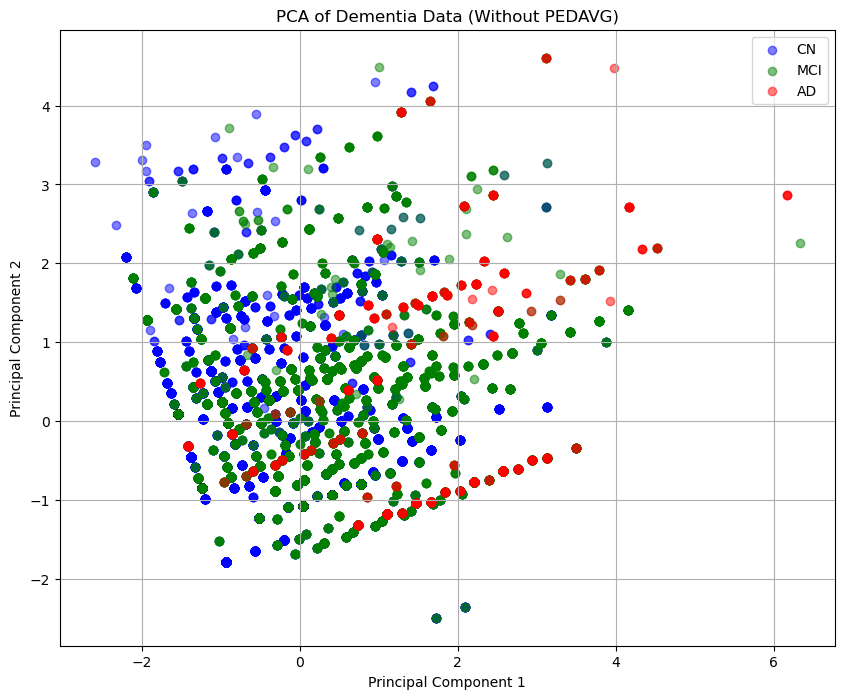

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Clean PEDAVG data by removing rows with 'DIV/0' errors (but we're dropping this column later)
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')

# Select relevant columns, dropping PEDAVG
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'MMSCORE', 'CDGLOBAL']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define a function to classify based on CDGLOBAL
def classify_cdglobal(cdglobal):
    if cdglobal == 0:
        return 'CN'  # Cognitively Normal
    elif cdglobal == 0.5:
        return 'MCI'  # Mild Cognitive Impairment
    elif cdglobal >= 1.0:
        return 'AD'  # Alzheimer's Disease
    else:
        return None

# Apply classification
merged_data['CDGLOBAL_CLASS'] = merged_data['CDGLOBAL'].apply(classify_cdglobal)

# Drop any rows where classification resulted in None (e.g., CDR values that are not 0, 0.5, or >= 1.0)
merged_data.dropna(subset=['CDGLOBAL_CLASS'], inplace=True)

# Define features (excluding PEDAVG) and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE']]
y = merged_data['CDGLOBAL_CLASS']

# Feature Scaling (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 3: Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Use the principal components for prediction
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize the PCA-transformed features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for label, color in zip(['CN', 'MCI', 'AD'], ['blue', 'green', 'red']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, color=color, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dementia Data (Without PEDAVG)')
plt.legend(loc='best')
plt.grid()
plt.show()


Explained variance by each component: [0.4839773  0.27467991]


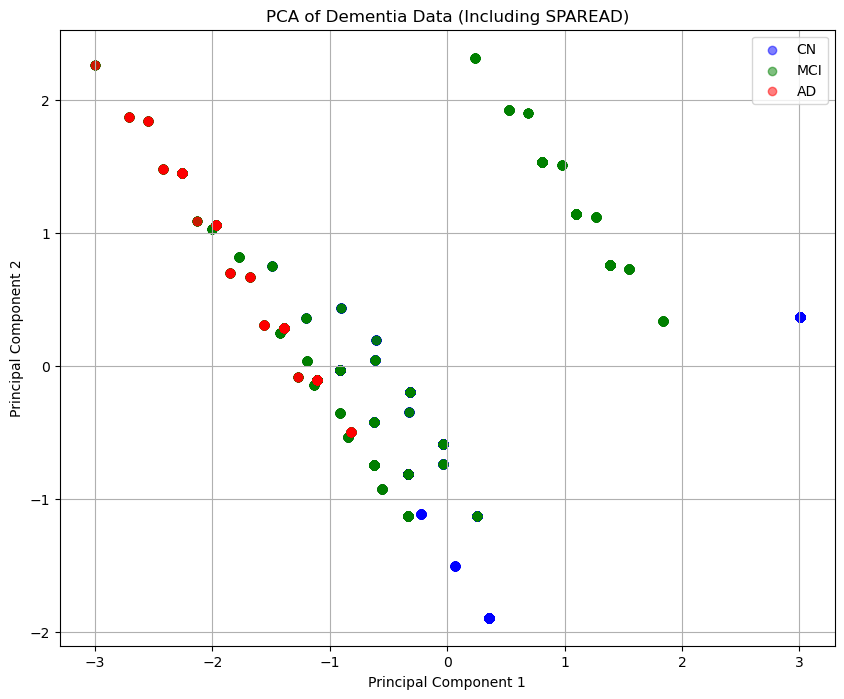

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')
spare_ad = pd.read_csv('cdr/sparead.csv')

# Assuming SPAREAD is already in your data or another file, make sure it's included
# Example: spare_ad = pd.read_csv('cdr/sparead.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Clean PEDAVG data by removing rows with 'DIV/0' errors (but we're dropping this column later)
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID, including SPAREAD
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')
merged_data = merged_data.merge(spare_ad[['RID', 'SPARE_AD']], on='RID')
# Assume SPAREAD is already merged or included in one of the above 


# Select relevant columns, now including SPAREAD and excluding PEDAVG
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'MMSCORE', 'SPARE_AD', 'CDGLOBAL']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define a function to classify based on CDGLOBAL
def classify_cdglobal(cdglobal):
    if cdglobal == 0:
        return 'CN'  # Cognitively Normal
    elif cdglobal == 0.5:
        return 'MCI'  # Mild Cognitive Impairment
    elif cdglobal >= 1.0:
        return 'AD'  # Alzheimer's Disease
    else:
        return None

# Apply classification
merged_data['CDGLOBAL_CLASS'] = merged_data['CDGLOBAL'].apply(classify_cdglobal)

# Drop any rows where classification resulted in None (e.g., CDR values that are not 0, 0.5, or >= 1.0)
merged_data.dropna(subset=['CDGLOBAL_CLASS'], inplace=True)

# Define features (including SPAREAD) and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'SPARE_AD']]
y = merged_data['CDGLOBAL_CLASS']

# Feature Scaling (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Visualize the PCA result
plt.figure(figsize=(10, 8))
for label, color in zip(['CN', 'MCI', 'AD'], ['blue', 'green', 'red']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, color=color, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dementia Data (Including SPAREAD)')
plt.legend(loc='best')
plt.grid()
plt.show()


Random Forest Model Precision: 0.833871678941754
Random Forest Model Recall: 0.8407330924109447
Confusion Matrix:
 [[1572    0    0  285]
 [   6    3    3   49]
 [   1    1    0    0]
 [ 257   14    1 1682]]
Classification Report:
               precision    recall  f1-score   support

          CN       0.86      0.85      0.85      1857
         MCI       0.17      0.05      0.08        61
 Moderate CI       0.00      0.00      0.00         2
          QD       0.83      0.86      0.85      1954

    accuracy                           0.84      3874
   macro avg       0.46      0.44      0.44      3874
weighted avg       0.83      0.84      0.84      3874



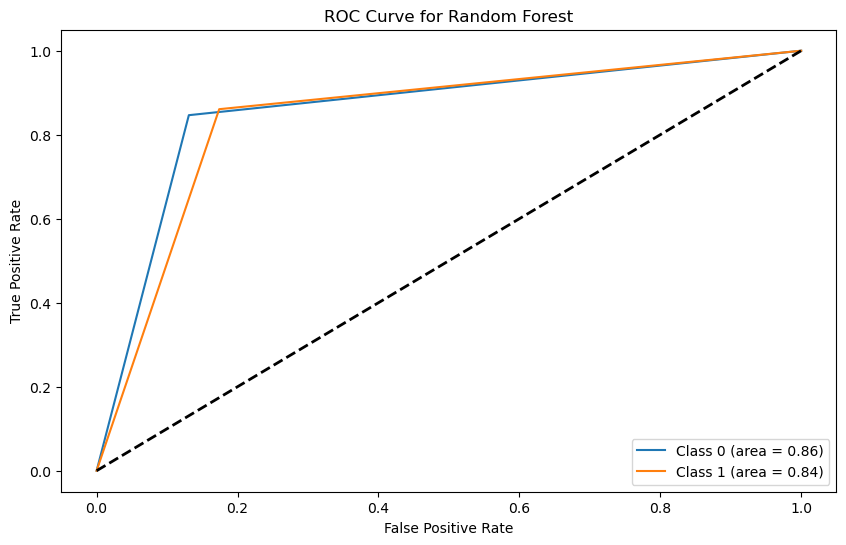

Feature Importances:
           Importance
AGE_2024    0.450445
PEDAVG      0.272296
PTEDUCAT    0.158689
MMSCORE     0.118570


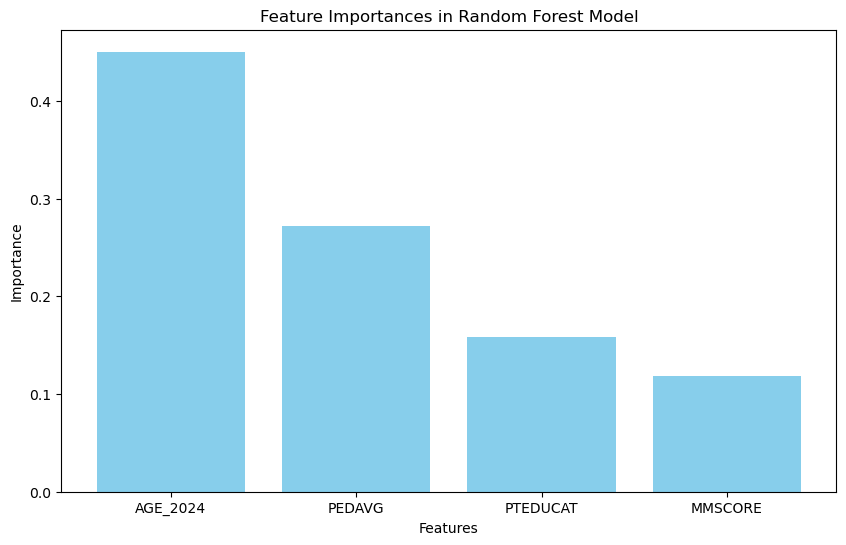

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt

# Load the data
dementia_rating = pd.read_csv('cdr/dementiarating.csv')
demographics = pd.read_csv('cdr/demographics.csv')
mm_score = pd.read_csv('cdr/mmse.csv')
ped = pd.read_csv('cdr/ped.csv')

# Convert PTDOBYY to age in 2024
demographics['AGE_2024'] = 2024 - demographics['PTDOBYY']

# Clean PEDAVG data by removing rows with 'DIV/0' errors
ped = ped[ped['PEDAVG'] != '#DIV/0!']
ped['PEDAVG'] = pd.to_numeric(ped['PEDAVG'], errors='coerce')
ped.dropna(subset=['PEDAVG'], inplace=True)

# Merge the dataframes on RID
merged_data = dementia_rating.merge(demographics, on='RID')
merged_data = merged_data.merge(mm_score[['RID', 'MMSCORE']], on='RID')
merged_data = merged_data.merge(ped[['RID', 'PEDAVG']], on='RID')

# Select relevant columns
merged_data = merged_data[['RID', 'AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG', 'CDGLOBAL']]

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define a function to classify based on CDGLOBAL
def classify_cdglobal(cdglobal):
    if cdglobal == 0:
        return 'CN'  # Cognitively Normal
    elif cdglobal == 0.5:
        return 'QD'  # Questionable Dementia
    elif cdglobal == 1.0:
        return 'MCI'  # Mild Cognitive Impairment
    elif cdglobal == 2.0:
        return 'Moderate CI'  # Moderate Cognitive Impairment
    elif cdglobal == 3.0:
        return 'Severe'  # Severe Cognitive Impairment
    else:
        return None

# Apply classification
merged_data['CDGLOBAL_CLASS'] = merged_data['CDGLOBAL'].apply(classify_cdglobal)

# Drop any rows where classification resulted in None
merged_data.dropna(subset=['CDGLOBAL_CLASS'], inplace=True)

# Define features and target variable
X = merged_data[['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG']]
y = merged_data['CDGLOBAL_CLASS']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Model Precision: {precision_rf}')
print(f'Random Forest Model Recall: {recall_rf}')

# Confusion Matrix and Classification Report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n {conf_matrix_rf}')

class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n {class_report_rf}')

# Plot ROC Curve for Random Forest if multiple classes exist
if len(np.unique(y_test)) > 1:
    y_test_bin = label_binarize(y_test, classes=['CN', 'QD', 'MCI', 'Moderate CI', 'Severe'])
    y_pred_rf_bin = label_binarize(y_pred_rf, classes=['CN', 'QD', 'MCI', 'Moderate CI', 'Severe'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(len(np.unique(y_test_bin))):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_rf_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 6))
    for i in range(len(np.unique(y_test_bin))):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve is not plotted because only one class is present in y_test.")

# Feature Importance Plot
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=['AGE_2024', 'PTEDUCAT', 'MMSCORE', 'PEDAVG'], columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


### Addendum: Demographic Stats

In [13]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'cdr/dementiarating.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame to include rows where '6to10' is not blank
filtered_df = df[df['6to10'].notna()]

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_df)

# Save the filtered DataFrame to a new CSV file (optional)
filtered_file_path = 'filtered_file.csv'  # Replace with your desired output file name
filtered_df.to_csv(filtered_file_path, index=False)
print(f"\nFiltered data saved to {filtered_file_path}")


Filtered DataFrame:
        RID  CDGLOBAL  CDRSB     2  11  CDRSBDIFF   6to10
6         8       0.0    0.0  11.0   1        5.0     8.0
12       15       0.0    0.0  20.0   1        1.0    15.0
24       30       0.5    1.0  31.0  14        8.0    30.0
27       33       0.5    2.0  34.0   1        3.5    33.0
33       41       0.5    1.5  36.0   1        5.5    41.0
...     ...       ...    ...   ...  ..        ...     ...
13373  4081       0.5    4.0   NaN   0        4.0  4081.0
13376  6446       0.5    1.0   NaN   0        1.0  6446.0
13379  4399       0.0    0.0   NaN   0        0.5  4399.0
13387  5113       0.0    0.0   NaN   0        0.5  5113.0
13389  6480       0.5    1.5   NaN   0        1.5  6480.0

[4888 rows x 7 columns]

Filtered data saved to filtered_file.csv


In [22]:
# Compute aggregate statistics
num_unique_subjects = filtered_df['RID'].nunique()

# Overall stats for CDRSB
cdrsb_min = filtered_df['CDRSB'].min()
cdrsb_max = filtered_df['CDRSB'].max()
cdrsb_mean = filtered_df['CDRSB'].mean()
cdrsb_std = filtered_df['CDRSB'].std()

# Overall stats for CDRSBDIFF
cdrsbdiff_min = filtered_df['CDRSBDIFF'].min()
cdrsbdiff_max = filtered_df['CDRSBDIFF'].max()
cdrsbdiff_mean = filtered_df['CDRSBDIFF'].mean()
cdrsbdiff_std = filtered_df['CDRSBDIFF'].std()

# Display results
print("\n--- Aggregate Statistics ---")
print(f"Total Unique Subjects (RIDs): {num_unique_subjects}")
print(f"CDRSB - Min: {cdrsb_min}, Max: {cdrsb_max}, Mean: {cdrsb_mean:.2f}, Std Dev: {cdrsb_std:.2f}")
print(f"CDRSBDIFF - Min: {cdrsbdiff_min}, Max: {cdrsbdiff_max}, Mean: {cdrsbdiff_mean:.2f}, Std Dev: {cdrsbdiff_std:.2f}")



--- Aggregate Statistics ---
Total Unique Subjects (RIDs): 661
CDRSB - Min: 0.0, Max: 18.0, Mean: 1.88, Std Dev: 2.75
CDRSBDIFF - Min: 0.0, Max: 17.5, Mean: 3.29, Std Dev: 3.93


In [27]:
demographics_df = pd.read_csv('cdr/demographics.csv')
demographics_df.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,04/1931,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,12/1944,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,05/1924,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,01/1938,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,12/1931,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0


In [31]:
type(demographics_df['PTDOB'])

pandas.core.series.Series

In [48]:
import pandas as pd

# File path to demographics.csv
demographics_path = 'cdr/demographics.csv'  # Replace with the actual file path

# Read the demographics file
demographics_df = pd.read_csv(demographics_path)

# Ensure PTDOBYY is numeric
demographics_df['PTDOBYY'] = pd.to_numeric(demographics_df['PTDOBYY'], errors='coerce')

# Drop rows with invalid PTDOBYY (NaN values)
demographics_df = demographics_df.dropna(subset=['PTDOBYY'])

# Ensure PTDOBYY is an integer
demographics_df['PTDOBYY'] = demographics_df['PTDOBYY'].astype(int)

# Calculate max, min, and average for PTDOBYY
ptdobyy_min = demographics_df['PTDOBYY'].min()
ptdobyy_max = demographics_df['PTDOBYY'].max()
ptdobyy_avg = demographics_df['PTDOBYY'].mean()

# Display results
print("\n--- PTDOBYY Statistics ---")
print(f"Min PTDOBYY: {ptdobyy_min}")
print(f"Max PTDOBYY: {ptdobyy_max}")
print(f"Avg PTDOBYY: {ptdobyy_avg:.2f}")



--- PTDOBYY Statistics ---
Min PTDOBYY: 1915
Max PTDOBYY: 1971
Avg PTDOBYY: 1939.12


In [38]:
demographics_path = 'cdr/demographics.csv'  # Replace with the actual file path

# Read the demographics file
demographics_df = pd.read_csv(demographics_path)
demographics_df.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,04/1931,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,12/1944,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,05/1924,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,01/1938,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,12/1931,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0


In [39]:
demographics_df['PTDOB'] = pd.to_datetime(demographics_df['PTDOB'], format='%b-%y', errors='coerce')
demographics_df.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,NaT,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,NaT,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,NaT,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,NaT,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,NaT,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0


In [45]:
type(int(demographics_df['PTDOBYY']))

TypeError: cannot convert the series to <class 'int'>

In [42]:
current_year

2024

In [43]:
type(current_year)

int

In [50]:
demographics_df['PTGENDER'] = pd.to_numeric(demographics_df['PTGENDER'], errors='coerce')

# Drop rows with invalid PTGENDER (NaN values)
demographics_df = demographics_df.dropna(subset=['PTGENDER'])

# Ensure PTGENDER is an integer
demographics_df['PTGENDER'] = demographics_df['PTGENDER'].astype(int)

# Join filtered_df with demographics_df on RID
merged_df = filtered_df.merge(demographics_df, on='RID', how='inner')

# Group by RID and calculate PTGENDER distribution
ptgender_distribution = merged_df.groupby('RID')['PTGENDER'].first().value_counts()

# Display results
print("\n--- PTGENDER Distribution (Filtered Subjects, Grouped by RID) ---")
print(ptgender_distribution)


--- PTGENDER Distribution (Filtered Subjects, Grouped by RID) ---
PTGENDER
1    359
2    302
Name: count, dtype: int64
